# Solar Power Generation Analysis

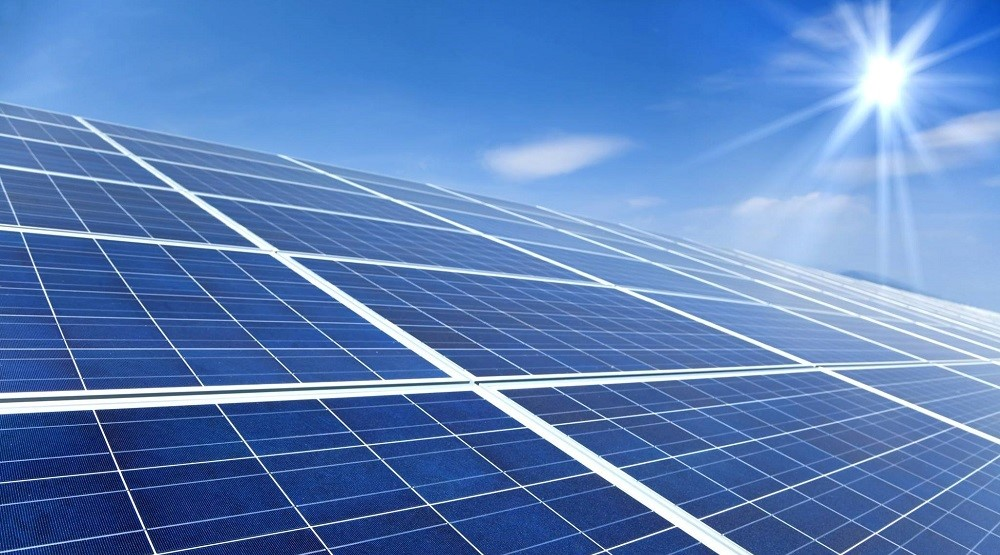

**Loading Python relevant libraries**

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import datetime
from datetime import datetime

# Introduction

**About the Dataset**

A model that predicts the output of a solar power system installed in Berkeley, CA.

**Tasks**

* Analyzing the amount of power generated by the system under environmental
influences (such as Is Daylight, Distance_to_Solar_Noon, Relative_Humidity, etc.) 
and times factors (such as Month, First Hour of Period, etc.)
* Exploring the correlation between Distance to solar noon and Daylight
* Exploring the correlation between Sky Cover to Solar Power Generation.

**Loading the Solar Power Generation dataset into DataFrame**

In [4]:
# Import Data DataSet
# Define new column's names without spaces
col_names = ['Day_of_Year', 'Year', 'Month', 'Day', 'First_Hour_of_Period', 'Is_Daylight', 'Distance_to_Solar_Noon', 'Average_Temperature_Day',
            'Average_Wind_Direction_Day', 'Average_Wind_Speed_Day', 'Sky_Cover', 'Visibility', 'Relative_Humidity', 'Average_Wind_Speed_Period',
            'Average_Barometric_Pressure_Period', 'Power_Generated']
df=pd.read_csv(r"C:\Users\Orly\Documents\Solar Energy\BigML_Dataset_5f50a4cc0d052e40e6000034.csv", header=0, names=col_names)

In [3]:
df

,Day_of_Year,Year,Month,Day,First_Hour_of_Period,Is_Daylight,Distance_to_Solar_Noon,Average_Temperature_Day,Average_Wind_Direction_Day,Average_Wind_Speed_Day,Sky_Cover,Visibility,Relative_Humidity,Average_Wind_Speed_Period,Average_Barometric_Pressure_Period,Power_Generated
0,245,2008,9,1,1,False,0.859897,69,28,7.5,0,10.0,75,8.0,29.82,0
1,245,2008,9,1,4,False,0.628535,69,28,7.5,0,10.0,77,5.0,29.85,0
2,245,2008,9,1,7,True,0.397172,69,28,7.5,0,10.0,70,0.0,29.89,5418
3,245,2008,9,1,10,True,0.165810,69,28,7.5,0,10.0,33,0.0,29.91,25477
4,245,2008,9,1,13,True,0.065553,69,28,7.5,0,10.0,21,3.0,29.89,30069
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2915,243,2009,8,31,10,True,0.166453,63,27,13.9,4,10.0,75,10.0,29.93,6995
2916,243,2009,8,31,13,True,0.064020,63,27,13.9,1,10.0,66,15.0,29.91,29490
2917,243,2009,8,31,16,True,0.294494,63,27,13.9,2,10.0,68,21.0,29.88,17257
2918,243,2009,8,31,19,True,0.524968,63,27,13.9,2,10.0,81,17.0,29.87,677


**Data Shape**

In [4]:
print(f'This frame has {df.shape[0]} rows over {df.shape[1]} columns')

This frame has 2920 rows over 16 columns


**Sampling some rows**

In [22]:
df.sample(3)

,Day_of_Year,Year,Month,Day,First_Hour_of_Period,Is_Daylight,Distance_to_Solar_Noon,Average_Temperature_Day,Average_Wind_Direction_Day,Average_Wind_Speed_Day,Sky_Cover,Visibility,Relative_Humidity,Average_Wind_Speed_Period,Average_Barometric_Pressure_Period,Power Generated
1259,36,2009,2,5,10,True,0.133758,55,16,10.3,3,10.0,83,11.0,29.96,4891
2354,173,2009,6,22,7,True,0.351747,67,29,10.7,0,10.0,72,0.0,29.84,8824
1910,117,2009,4,27,19,True,0.504274,52,26,16.8,2,10.0,69,11.0,30.03,1308


**Data Dictionary**

* Day of Year
* Year
* Month
* Day
* First Hour of Period- 1, 4, 7, 10 AM, 1, 4, 7, 10 PM
* Is Daylight- TRUE/FALSE
* Distance to Solar Noon- Solar noon is the moment when the Sun passes a
  solar system meridian location and reaches its highest position in the sky
    relatively to the specific solar system.
* Average Temperature (Day)- in Fahrenheit degrees.
* Average Wind Direction (Day)
* Average Wind Speed (Day)
* Sky Cover- 0: Sky clear-Fine, 1: Sky covered or less-Fine, but not zero, 2:Sky covered-Fine, 3: Sky covered- Partly Cloudy, 4:Sky covered- Partly Cloudy
* Visibility
* Relative Humidity
* Average Wind Speed (Period)
* Average Barometric Pressure (Period)
* Power Generation


# Cleanup

In [4]:
print(len(df))

2920


The data contains 2920 rows

In [5]:
df.isnull().sum()

Day_of_Year                           0
Year                                  0
Month                                 0
Day                                   0
First_Hour_of_Period                  0
Is_Daylight                           0
Distance_to_Solar_Noon                0
Average_Temperature_Day               0
Average_Wind_Direction_Day            0
Average_Wind_Speed_Day                0
Sky_Cover                             0
Visibility                            0
Relative_Humidity                     0
Average_Wind_Speed_Period             1
Average_Barometric_Pressure_Period    0
Power_Generated                       0
dtype: int64

The dataset contains a null value in Average Wind Speed (Period) column. We will deal with it and change it to 0. 

In [6]:
df.fillna(0, inplace=True)
df.isnull().sum()

Day_of_Year                           0
Year                                  0
Month                                 0
Day                                   0
First_Hour_of_Period                  0
Is_Daylight                           0
Distance_to_Solar_Noon                0
Average_Temperature_Day               0
Average_Wind_Direction_Day            0
Average_Wind_Speed_Day                0
Sky_Cover                             0
Visibility                            0
Relative_Humidity                     0
Average_Wind_Speed_Period             0
Average_Barometric_Pressure_Period    0
Power_Generated                       0
dtype: int64

Checking for spelling mistakes for Year column and Is_Daylight column

In [5]:
print(len(df))

2920


In [6]:
df['Year'].value_counts()

2009    1944
2008     976
Name: Year, dtype: int64

In [7]:
df['Is_Daylight'].value_counts()

True     1805
False    1115
Name: Is_Daylight, dtype: int64

The dataset isn't contain spelling mistakes

**Validating Datatypes**

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2920 entries, 0 to 2919
Data columns (total 16 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Day_of_Year                         2920 non-null   int64  
 1   Year                                2920 non-null   int64  
 2   Month                               2920 non-null   int64  
 3   Day                                 2920 non-null   int64  
 4   First_Hour_of_Period                2920 non-null   int64  
 5   Is_Daylight                         2920 non-null   bool   
 6   Distance_to_Solar_Noon              2920 non-null   float64
 7   Average_Temperature_Day             2920 non-null   int64  
 8   Average_Wind_Direction_Day          2920 non-null   int64  
 9   Average_Wind_Speed_Day              2920 non-null   float64
 10  Sky_Cover                           2920 non-null   int64  
 11  Visibility                          2920 no

Creating Datime column

In [7]:
df['Date'] = df[['Year', 'Month', 'Day']].apply(lambda x: '{}-{}-{}'.format(x[0], x[1], x[2]), axis=1)

df['Date'].head()

0    2008-9-1
1    2008-9-1
2    2008-9-1
3    2008-9-1
4    2008-9-1
Name: Date, dtype: object

Convert The data types of date column to date

In [8]:
df['Date']=pd.to_datetime(df['Date'])

Creating year_Month column

In [16]:
df['Year_Month'] = pd.to_datetime(df['Year_Month'], format='%Y-%m')
df['Year_Month']

0      2008-09-01
1      2008-09-01
2      2008-09-01
3      2008-09-01
4      2008-09-01
          ...    
2915   2009-08-01
2916   2009-08-01
2917   2009-08-01
2918   2009-08-01
2919   2009-08-01
Name: Year_Month, Length: 2920, dtype: datetime64[ns]

In [10]:
for col in df.columns: 
    print(col) 

Day_of_Year
Year
Month
Day
First_Hour_of_Period
Is_Daylight
Distance_to_Solar_Noon
Average_Temperature_Day
Average_Wind_Direction_Day
Average_Wind_Speed_Day
Sky_Cover
Visibility
Relative_Humidity
Average_Wind_Speed_Period
Average_Barometric_Pressure_Period
Power_Generated
Date
Year_Month


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2920 entries, 0 to 2919
Data columns (total 18 columns):
 #   Column                              Non-Null Count  Dtype         
---  ------                              --------------  -----         
 0   Day_of_Year                         2920 non-null   int64         
 1   Year                                2920 non-null   int64         
 2   Month                               2920 non-null   int64         
 3   Day                                 2920 non-null   int64         
 4   First_Hour_of_Period                2920 non-null   int64         
 5   Is_Daylight                         2920 non-null   bool          
 6   Distance_to_Solar_Noon              2920 non-null   float64       
 7   Average_Temperature_Day             2920 non-null   int64         
 8   Average_Wind_Direction_Day          2920 non-null   int64         
 9   Average_Wind_Speed_Day              2920 non-null   float64       
 10  Sky_Cover               

In [12]:
df

,Day_of_Year,Year,Month,Day,First_Hour_of_Period,Is_Daylight,Distance_to_Solar_Noon,Average_Temperature_Day,Average_Wind_Direction_Day,Average_Wind_Speed_Day,Sky_Cover,Visibility,Relative_Humidity,Average_Wind_Speed_Period,Average_Barometric_Pressure_Period,Power_Generated,Date,Year_Month
0,245,2008,9,1,1,False,0.859897,69,28,7.5,0,10.0,75,8.0,29.82,0,2008-09-01,2008-9
1,245,2008,9,1,4,False,0.628535,69,28,7.5,0,10.0,77,5.0,29.85,0,2008-09-01,2008-9
2,245,2008,9,1,7,True,0.397172,69,28,7.5,0,10.0,70,0.0,29.89,5418,2008-09-01,2008-9
3,245,2008,9,1,10,True,0.165810,69,28,7.5,0,10.0,33,0.0,29.91,25477,2008-09-01,2008-9
4,245,2008,9,1,13,True,0.065553,69,28,7.5,0,10.0,21,3.0,29.89,30069,2008-09-01,2008-9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2915,243,2009,8,31,10,True,0.166453,63,27,13.9,4,10.0,75,10.0,29.93,6995,2009-08-31,2009-8
2916,243,2009,8,31,13,True,0.064020,63,27,13.9,1,10.0,66,15.0,29.91,29490,2009-08-31,2009-8
2917,243,2009,8,31,16,True,0.294494,63,27,13.9,2,10.0,68,21.0,29.88,17257,2009-08-31,2009-8
2918,243,2009,8,31,19,True,0.524968,63,27,13.9,2,10.0,81,17.0,29.87,677,2009-08-31,2009-8


**Checking if the data has duplicates rows**

In [14]:
print(len(df))

2920


In [13]:
df.nunique()

Day_of_Year                            365
Year                                     2
Month                                   12
Day                                     31
First_Hour_of_Period                     8
Is_Daylight                              2
Distance_to_Solar_Noon                2660
Average_Temperature_Day                 37
Average_Wind_Direction_Day              35
Average_Wind_Speed_Day                 159
Sky_Cover                                5
Visibility                              17
Relative_Humidity                       75
Average_Wind_Speed_Period               32
Average_Barometric_Pressure_Period      90
Power_Generated                       1529
Date                                   365
Year_Month                              12
dtype: int64

The dataset isn't contained duplicate rows

# Analysis

# Univariate Analysis

The columns in the dataset are divide into categorical and quantitative variables

In [10]:
df.describe(include=[np.number], percentiles=[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]).T

,count,mean,std,min,10%,20%,30%,40%,50%,60%,70%,80%,90%,max
Day_of_Year,2920.0,183.334247,105.769919,1.000000,37.000000,73.800000,110.00000,146.600000,183.000000,219.40000,257.0000,293.200000,330.000000,366.000000
Year,2920.0,2008.665753,0.471807,2008.000000,2008.000000,2008.000000,2008.00000,2009.000000,2009.000000,2009.00000,2009.0000,2009.000000,2009.000000,2009.000000
Month,2920.0,6.526027,3.448442,1.000000,2.000000,3.000000,4.00000,5.000000,7.000000,8.00000,9.0000,10.000000,11.000000,12.000000
Day,2920.0,15.720548,8.797754,1.000000,4.000000,7.000000,10.00000,13.000000,16.000000,19.00000,22.0000,25.000000,28.000000,31.000000
First_Hour_of_Period,2920.0,11.500000,6.875041,1.000000,1.000000,4.000000,7.00000,10.000000,11.500000,13.00000,16.0000,19.000000,22.000000,22.000000
Distance_to_Solar_Noon,2920.0,0.503294,0.298024,0.050401,0.118674,0.168271,0.29544,0.402771,0.478957,0.58614,0.6934,0.775797,0.927395,1.141361
Average_Temperature_Day,2920.0,58.468493,6.841200,42.000000,49.000000,52.000000,55.00000,56.000000,59.000000,61.00000,62.0000,64.000000,67.000000,78.000000
Average_Wind_Direction_Day,2920.0,24.953425,6.915178,1.000000,14.000000,20.800000,26.00000,27.000000,27.000000,28.00000,29.0000,29.000000,30.000000,36.000000
Average_Wind_Speed_Day,2920.0,10.096986,4.838185,1.100000,3.800000,5.660000,7.30000,8.660000,10.000000,11.10000,12.6000,14.000000,16.100000,26.600000
Sky_Cover,2920.0,1.987671,1.411978,0.000000,0.000000,1.000000,1.00000,1.000000,2.000000,3.00000,3.0000,4.000000,4.000000,4.000000


**Is Daylight**

In [34]:
df['Is_Daylight'].value_counts(normalize=True)

True     0.618151
False    0.381849
Name: Is_Daylight, dtype: float64

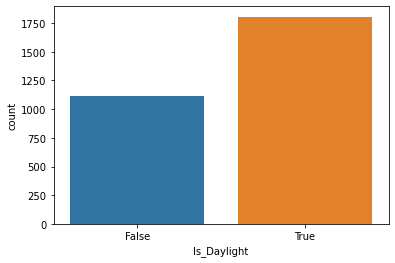

In [35]:
sns.countplot(data=df, x='Is_Daylight')
plt.show()

We can see that most of the data is on daylight (61.8%)

**Distance to Solar Noon**

In [13]:
df['Distance_to_Solar_Noon_Categorized']=pd.cut(x=df['Distance_to_Solar_Noon'],bins=df['Distance_to_Solar_Noon'].quantile([0, 0.25, 0.50,0.75, 1]))
df['Distance_to_Solar_Noon_Categorized'].value_counts(normalize=True).sort_index()



(0.0504, 0.244]    0.249486
(0.244, 0.479]     0.250171
(0.479, 0.74]      0.250171
(0.74, 1.141]      0.250171
Name: Distance_to_Solar_Noon_Categorized, dtype: float64

Text(0.5, 1.0, 'distribution_of_Distance_to_Solar_Noon')

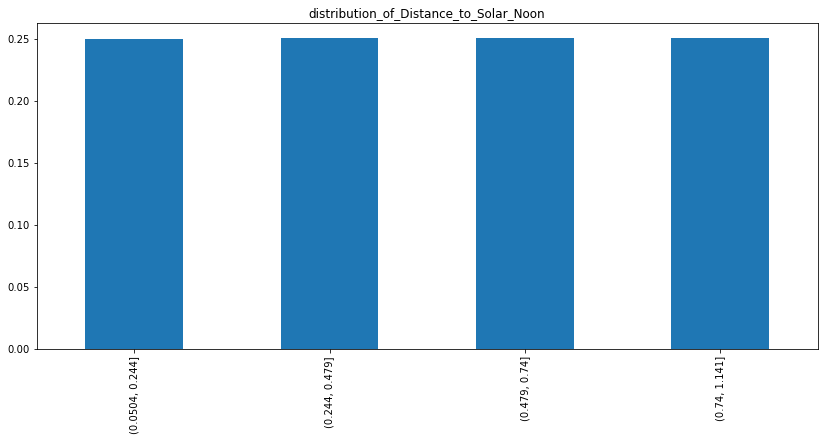

In [24]:
ax= df['Distance_to_Solar_Noon_Categorized'].value_counts(normalize=True).sort_index().plot(kind='bar', figsize=(14,6))
ax.set_title('distribution_of_Distance_to_Solar_Noon')


We can see that all the 'Distance_to_Solar_Noon_Categorized' have the same distribution  

**Average Temperature (Day)**

In [14]:
df['Average_Temperature_Day_Categorized']= pd.cut(x=df['Average_Temperature_Day'],bins=df['Average_Temperature_Day'].quantile([0, 0.25, 0.50,0.75, 1]))
df['Average_Temperature_Day_Categorized'].value_counts(normalize=True)

(53.0, 59.0]    0.285714
(42.0, 53.0]    0.250000
(59.0, 63.0]    0.236264
(63.0, 78.0]    0.228022
Name: Average_Temperature_Day_Categorized, dtype: float64

Text(0.5, 1.0, 'Distribution of Average Temperature')

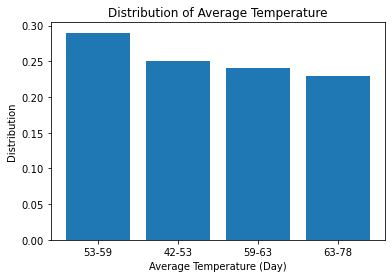

In [15]:
Avg_Temperature_x= ['53-59', '42-53', '59-63', '63-78']
Distribution_y= [0.29, 0.25, 0.24, 0.23] 
plt.bar(Avg_Temperature_x, Distribution_y)

plt.xlabel('Average Temperature (Day)')
plt.ylabel('Distribution')
plt.title('Distribution of Average Temperature')

#  Another code for the bar plot
#ax= df['Average Temperature (Day)_Categorized'].value_counts(normalize=True).plot(kind='bar', figsize=(14,6))
#ax.set_title('distribution of Average Temperature (Day)')

Most of the measurements are at 53-59 Average temperature

**Average Wind Direction (Day)**

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


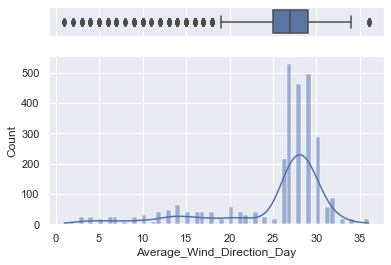

In [41]:
# set a grey background (use sns.set_theme() if seaborn version 0.11.0 or above) 
sns.set(style="darkgrid")
 
# creating a figure composed of two matplotlib.Axes objects (ax_box and ax_hist)
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})
 
# assigning a graph to each ax
sns.boxplot(df['Average_Wind_Direction_Day'], ax=ax_box)
sns.histplot(data=df, x='Average_Wind_Direction_Day', ax=ax_hist, kde=True)
 
# Remove x axis name for the boxplot
ax_box.set(xlabel='')
plt.show()

In [42]:
df['Average_Wind_Direction_Day_Categorized']= pd.cut(x=df['Average_Wind_Direction_Day'],bins=df['Average_Wind_Direction_Day'].quantile([0, 0.25, 0.50,0.75, 1]))
df['Average_Wind_Direction_Day_Categorized'].value_counts(normalize=True)

(27.0, 29.0]    0.329670
(25.0, 27.0]    0.255495
(1.0, 25.0]     0.250000
(29.0, 36.0]    0.164835
Name: Average_Wind_Direction_Day_Categorized, dtype: float64

We can see highly left skewed distribution with ouliers on the left side.

**Average Wind Speed (Day)**

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


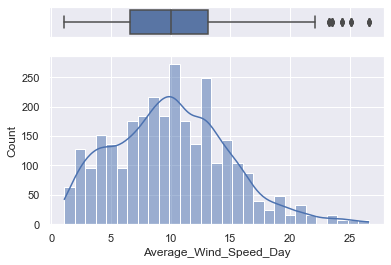

In [43]:
# set a grey background (use sns.set_theme() if seaborn version 0.11.0 or above) 
sns.set(style="darkgrid")
 
# creating a figure composed of two matplotlib.Axes objects (ax_box and ax_hist)
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})
 
# assigning a graph to each ax
sns.boxplot(df['Average_Wind_Speed_Day'], ax=ax_box)
sns.histplot(data=df, x='Average_Wind_Speed_Day', ax=ax_hist, kde=True)
 
# Remove x axis name for the boxplot
ax_box.set(xlabel='')
plt.show()

In [11]:
df['Average_Wind_Speed_Day_Categorized']= pd.cut(x=df['Average_Wind_Speed_Day'],bins=df['Average_Wind_Speed_Day'].quantile([0, 0.25, 0.50,0.75, 1]))
df['Average_Wind_Speed_Day_Categorized'].value_counts(normalize=True).sort_index()

(1.1, 6.6]      0.260989
(6.6, 10.0]     0.239011
(10.0, 13.1]    0.252747
(13.1, 26.6]    0.247253
Name: Average_Wind_Speed_Day_Categorized, dtype: float64

We can see right skewed distribution with ouliers on the right side.

**Sky Cover**

In [45]:
df['Sky_Cover'].value_counts(normalize=True)

1    0.265753
4    0.204795
3    0.198630
0    0.177397
2    0.153425
Name: Sky_Cover, dtype: float64

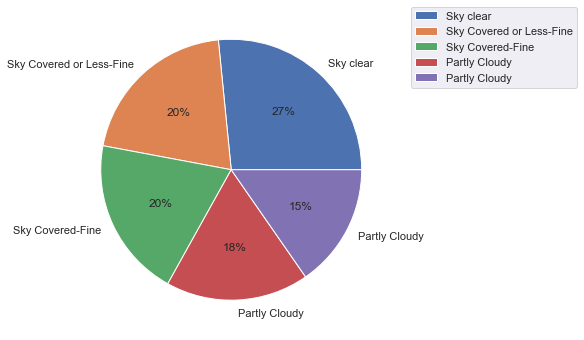

In [46]:
labels = {0: 'Sky clear', 1: 'Sky Covered or Less-Fine', 2: 'Sky Covered-Fine', 3: 'Partly Cloudy', 4: 'Partly Cloudy'}
df['Sky_Cover'].value_counts().plot(kind='pie', autopct='%1.0f%%', figsize=(6,6), labels=labels.values(), legend=True, ylabel='')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)

Most of the measurements are at clear 'Sky_Cover' (27%) 

**Visibility**

In [5]:
df['Visibility'].value_counts(normalize=True)

10.00    0.853082
9.00     0.057877
8.00     0.025000
4.00     0.014726
6.00     0.014384
7.00     0.012329
5.00     0.009932
3.00     0.004795
1.50     0.002055
0.25     0.001370
2.50     0.001370
2.00     0.000685
0.50     0.000685
1.75     0.000685
0.00     0.000342
0.75     0.000342
1.25     0.000342
Name: Visibility, dtype: float64

we can see that in most of the cases the visibility was 10.0,
so we will transform the float numbers to whole numbers


In [8]:
df['Visibility'] = df['Visibility'].astype(int)

In [9]:
# The values in the 'Visibility' column rounded down
df['Visibility'].value_counts(normalize=True)

10    0.853082
9     0.057877
8     0.025000
4     0.014726
6     0.014384
7     0.012329
5     0.009932
3     0.004795
1     0.003082
0     0.002740
2     0.002055
Name: Visibility, dtype: float64

**Relative_Humidity**

In [49]:
df['Relative_Humidity'].value_counts(normalize=True)

83    0.074658
90    0.059247
80    0.055137
86    0.053425
93    0.048288
        ...   
19    0.000685
82    0.000685
20    0.000342
23    0.000342
14    0.000342
Name: Relative_Humidity, Length: 75, dtype: float64

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


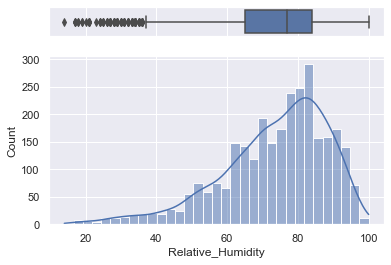

In [50]:
# set a grey background (use sns.set_theme() if seaborn version 0.11.0 or above) 
sns.set(style="darkgrid")
 
# creating a figure composed of two matplotlib.Axes objects (ax_box and ax_hist)
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})
 
# assigning a graph to each ax
sns.boxplot(df['Relative_Humidity'], ax=ax_box)
sns.histplot(data=df, x='Relative_Humidity', ax=ax_hist, kde=True)
 
# Remove x axis name for the boxplot
ax_box.set(xlabel='')
plt.show()

We can see a slight left-skewed distribution with outliers on the left side

**Average Wind Speed (Period)**

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


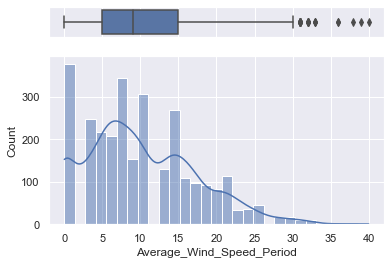

In [61]:
# set a grey background (use sns.set_theme() if seaborn version 0.11.0 or above) 
sns.set(style="darkgrid")
 
# creating a figure composed of two matplotlib.Axes objects (ax_box and ax_hist)
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})
 
# assigning a graph to each ax
sns.boxplot(df['Average_Wind_Speed_Period'], ax=ax_box)
sns.histplot(data=df, x='Average_Wind_Speed_Period', ax=ax_hist, kde=True)
 
# Remove x axis name for the boxplot
ax_box.set(xlabel='')
plt.show()

We can see a slight right-skewed distribution with outliers on the right side

**Average Barometric Pressure (Period)**

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


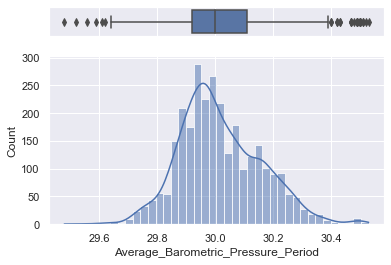

In [62]:
# set a grey background (use sns.set_theme() if seaborn version 0.11.0 or above) 
sns.set(style="darkgrid")
 
# creating a figure composed of two matplotlib.Axes objects (ax_box and ax_hist)
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})
 
# assigning a graph to each ax
sns.boxplot(df['Average_Barometric_Pressure_Period'], ax=ax_box)
sns.histplot(data=df, x='Average_Barometric_Pressure_Period', ax=ax_hist, kde=True)
 
# Remove x axis name for the boxplot
ax_box.set(xlabel='')
plt.show()

We can see a normal distribution with outliers on the right side and the left side both

**Power Generated**

In [8]:
Power_Generated_Count= df['Power_Generated'].value_counts(normalize=True).sort_values(ascending=False)
Power_Generated_Count

0        0.452055
229      0.001027
738      0.001027
3        0.001027
53       0.000685
           ...   
4957     0.000342
23873    0.000342
22231    0.000342
9224     0.000342
17257    0.000342
Name: Power_Generated, Length: 1529, dtype: float64

In [3]:
df['Power_Generated_Categorized']= pd.cut(x=df['Power_Generated'],bins=df['Power_Generated'].quantile([0, 0.50, 0.75, 1]), labels=['0-404', '404.1-12723.5', '12723.6-36580'], include_lowest=True)
df['Power_Generated_Categorized'].value_counts(normalize=True)

0-404            0.500342
12723.6-36580    0.250000
404.1-12723.5    0.249658
Name: Power_Generated_Categorized, dtype: float64

<AxesSubplot:>

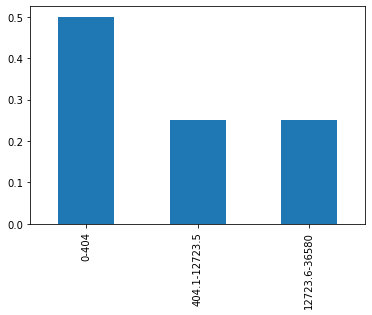

In [4]:
df['Power_Generated_Categorized'].value_counts(normalize=True).sort_index().plot(kind='bar')

We can see that most of the cases generated powers between 0 to 404  

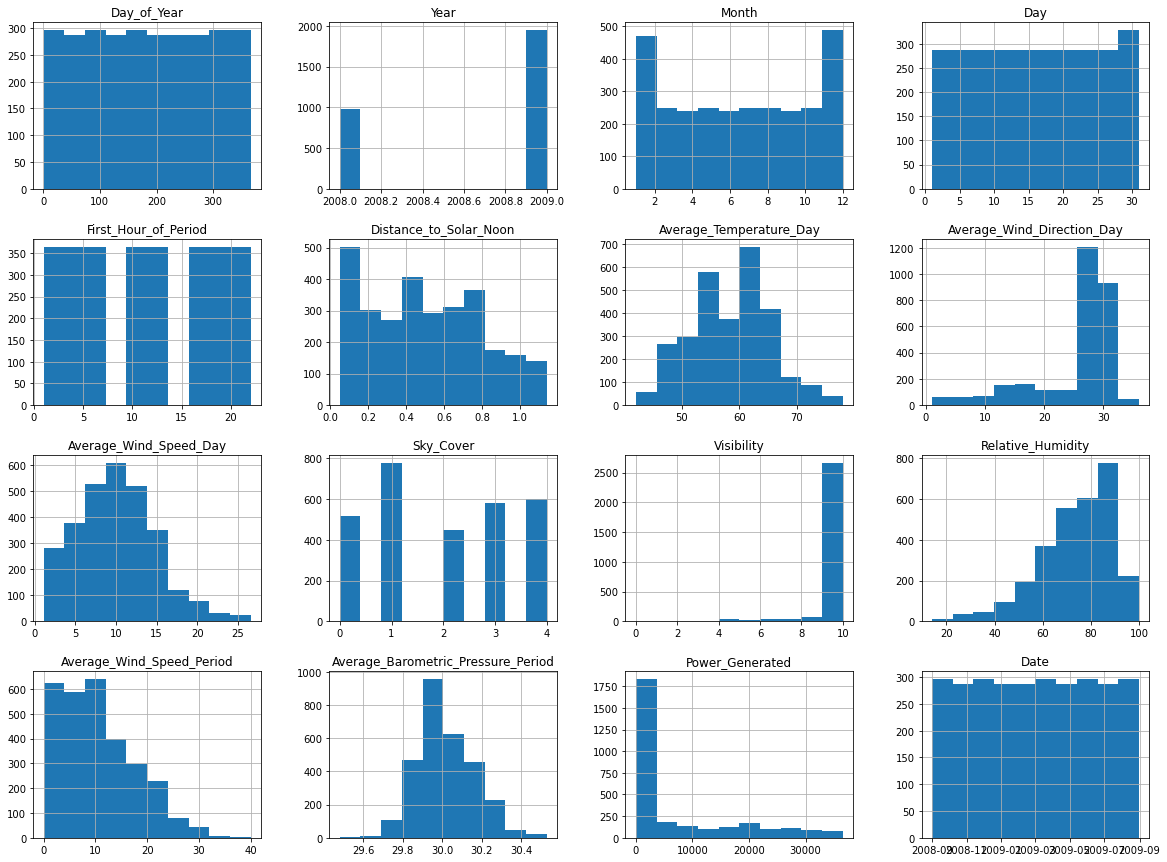

In [17]:
df.hist(bins=10,figsize=(20,15)) 
plt.show()

# Bivariate Analysis

In [ ]:
# Let's looking at correlation

In [57]:
df.corr(method='pearson').round(6)

,Day_of_Year,Year,Month,Day,First_Hour_of_Period,Is_Daylight,Distance_to_Solar_Noon,Average_Temperature_Day,Average_Wind_Direction_Day,Average_Wind_Speed_Day,Sky_Cover,Visibility,Relative_Humidity,Average_Wind_Speed_Period,Average_Barometric_Pressure_Period,Power_Generated
Day_of_Year,1.000000,-0.818537,0.996520,0.094796,-0.000000,-0.054880,0.044277,0.257592,0.190998,-0.088958,-0.052647,-0.006173,0.032213,-0.073227,-0.122333,-0.037377
Year,-0.818537,1.000000,-0.818367,-0.002703,-0.000000,0.087139,-0.135518,-0.046568,0.006147,0.304638,0.092548,0.090939,-0.004124,0.214389,-0.069928,0.123082
Month,0.996520,-0.818367,1.000000,0.011893,-0.000000,-0.054889,0.042974,0.262902,0.185719,-0.082071,-0.048411,-0.006686,0.029341,-0.068733,-0.128163,-0.036585
Day,0.094796,-0.002703,0.011893,1.000000,0.000000,0.004921,-0.000602,-0.022095,0.110605,-0.035987,-0.050966,0.025587,0.032486,-0.023474,0.038486,0.006718
First_Hour_of_Period,-0.000000,-0.000000,-0.000000,0.000000,1.000000,0.173048,-0.062159,-0.000000,0.000000,0.000000,-0.073582,0.050662,-0.251801,0.289482,-0.033697,0.107341
Is_Daylight,-0.054880,0.087139,-0.054889,0.004921,0.173048,1.000000,-0.827072,0.067230,0.056284,0.059940,0.028587,-0.087069,-0.340942,0.192290,-0.053754,0.532062
Distance_to_Solar_Noon,0.044277,-0.135518,0.042974,-0.000602,-0.062159,-0.827072,1.000000,-0.145207,-0.118010,-0.145073,-0.015184,0.065807,0.368964,-0.214891,0.082505,-0.746681
Average_Temperature_Day,0.257592,-0.046568,0.262902,-0.022095,-0.000000,0.067230,-0.145207,1.000000,0.342146,0.096267,-0.230672,0.194110,-0.221463,0.054546,-0.435723,0.132193
Average_Wind_Direction_Day,0.190998,0.006147,0.185719,0.110605,0.000000,0.056284,-0.118010,0.342146,1.000000,0.341529,-0.137140,0.203445,-0.095917,0.229844,-0.272405,0.146788
Average_Wind_Speed_Day,-0.088958,0.304638,-0.082071,-0.035987,0.000000,0.059940,-0.145073,0.096267,0.341529,1.000000,0.107793,0.184778,0.004901,0.673626,-0.379752,0.142641


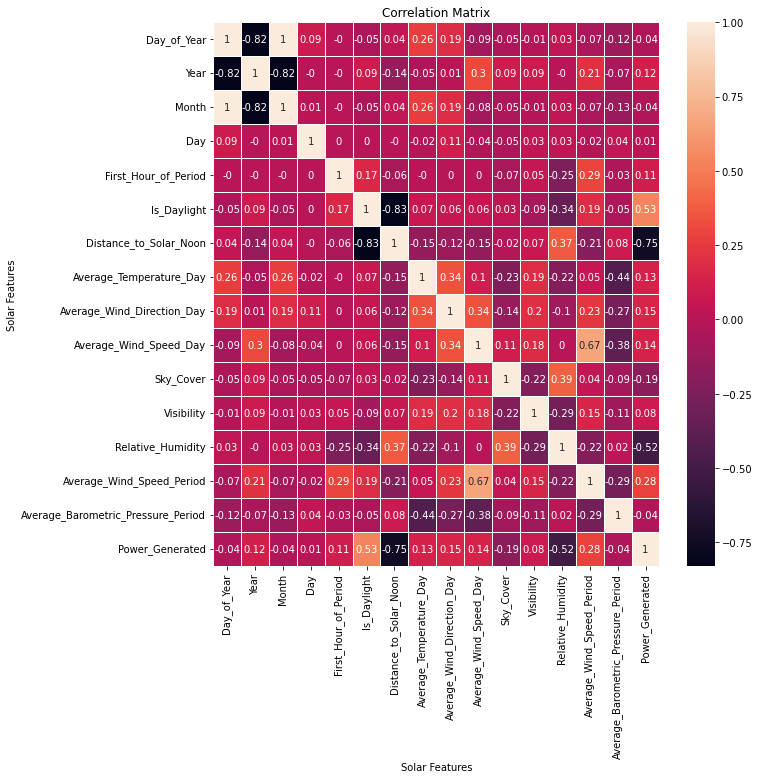

In [10]:
plt.figure(figsize=(10, 10))
correlation_matrix=df.corr(method='pearson').round(2)
sns.heatmap(correlation_matrix, annot=True, linewidths=.5)

plt.title('Correlation Matrix')
plt.xlabel('Solar Features')
plt.ylabel('Solar Features')
plt.show()

In [11]:
correlation_mat = df.corr().round(6)
corr_pairs = correlation_mat.unstack()
corr_pairs

Day_of_Year      Day_of_Year                           1.000000
                 Year                                 -0.818537
                 Month                                 0.996520
                 Day                                   0.094796
                 First_Hour_of_Period                 -0.000000
                                                         ...   
Power_Generated  Visibility                            0.076536
                 Relative_Humidity                    -0.522545
                 Average_Wind_Speed_Period             0.278377
                 Average_Barometric_Pressure_Period   -0.036771
                 Power_Generated                       1.000000
Length: 256, dtype: float64

In [12]:
sorted_pairs = corr_pairs.sort_values()
sorted_pairs

Distance_to_Solar_Noon              Is_Daylight                          -0.827072
Is_Daylight                         Distance_to_Solar_Noon               -0.827072
Day_of_Year                         Year                                 -0.818537
Year                                Day_of_Year                          -0.818537
                                    Month                                -0.818367
                                                                            ...   
Day                                 Day                                   1.000000
Month                               Month                                 1.000000
Year                                Year                                  1.000000
Average_Barometric_Pressure_Period  Average_Barometric_Pressure_Period    1.000000
Power_Generated                     Power_Generated                       1.000000
Length: 256, dtype: float64

Let's see which  variables have a high correlation (>0.5) 

In [61]:
high_corr = sorted_pairs[(sorted_pairs)>0.5]
high_corr

Is_Daylight                         Power_Generated                       0.532062
Power_Generated                     Is_Daylight                           0.532062
Average_Wind_Speed_Day              Average_Wind_Speed_Period             0.673626
Average_Wind_Speed_Period           Average_Wind_Speed_Day                0.673626
Month                               Day_of_Year                           0.996520
Day_of_Year                         Month                                 0.996520
                                    Day_of_Year                           1.000000
Average_Wind_Speed_Period           Average_Wind_Speed_Period             1.000000
Relative_Humidity                   Relative_Humidity                     1.000000
Visibility                          Visibility                            1.000000
Sky_Cover                           Sky_Cover                             1.000000
Average_Wind_Speed_Day              Average_Wind_Speed_Day                1.000000
Aver

Let's see which  variables have a high negative correlation (<-0.5) 

In [14]:
high_negative_corr = sorted_pairs[(sorted_pairs)<-0.5]
high_negative_corr

Distance_to_Solar_Noon  Is_Daylight              -0.827072
Is_Daylight             Distance_to_Solar_Noon   -0.827072
Day_of_Year             Year                     -0.818537
Year                    Day_of_Year              -0.818537
                        Month                    -0.818367
Month                   Year                     -0.818367
Distance_to_Solar_Noon  Power_Generated          -0.746681
Power_Generated         Distance_to_Solar_Noon   -0.746681
                        Relative_Humidity        -0.522545
Relative_Humidity       Power_Generated          -0.522545
dtype: float64


We can see :
* A high positive correlation between 'Is Daylight' and 'Power Generated'(0.53).
We need to multiply by 2 the lumens to get the desired power.
* A highly negative correlation between 'Distance to Solar Noon' and 'Power Generated'(-0.75).
The shorter the distance to solar noon the greater power we get
* A highly negative correlation between 'Distance to Solar Noon' and 'Is Daylight'(-0.83).
we can analyze later in which distance from noon the daylight is seen.
* A negative correlation between 'Relative Humidity' and 'Power Generated' (-0.52).
High Relative humidity decreases the power generated by half.

**The features that have the greatest impact on energy generation are Relative Humidity, Distance to solar noon and Is Daylight**

**categorical to numeric & categorical to categorical**

In [17]:
df.sort_values(by='Year_Month', inplace=True)
df_date=df.groupby(['Year_Month'])['Distance_to_Solar_Noon'].mean()
df_date

Year_Month
2008-09-01    0.484663
2008-10-01    0.537176
2008-11-01    0.592815
2008-12-01    0.625090
2009-01-01    0.605873
2009-02-01    0.554708
2009-03-01    0.500858
2009-04-01    0.454643
2009-05-01    0.421816
2009-06-01    0.407076
2009-07-01    0.414772
2009-08-01    0.442628
Name: Distance_to_Solar_Noon, dtype: float64

Text(0, 0.5, 'Mean Distance to Solar Noon')

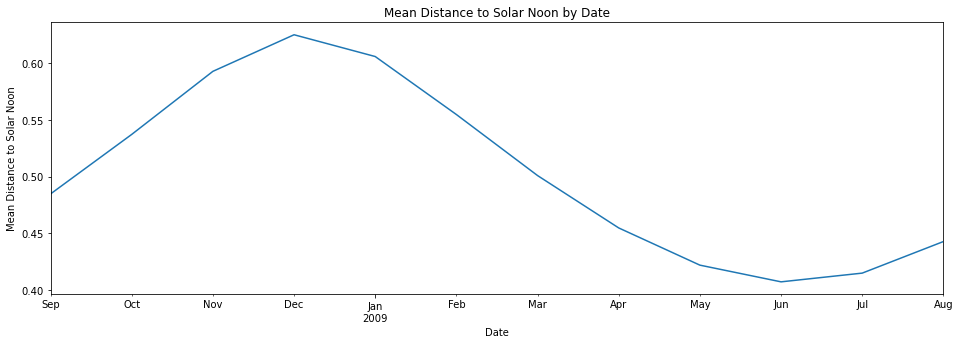

In [19]:
df_date=df.groupby(['Year_Month'])['Distance_to_Solar_Noon'].mean()
plt.figure(figsize=(16,5))
df_date.plot()

plt.title('Mean Distance to Solar Noon by Date')
plt.xlabel('Date')
plt.ylabel('Mean Distance to Solar Noon')

We can see that in the spring and summer seasons, the mean distance to solar noon gets shorter

**Let's see the Distance to solar noon vs Daylight**

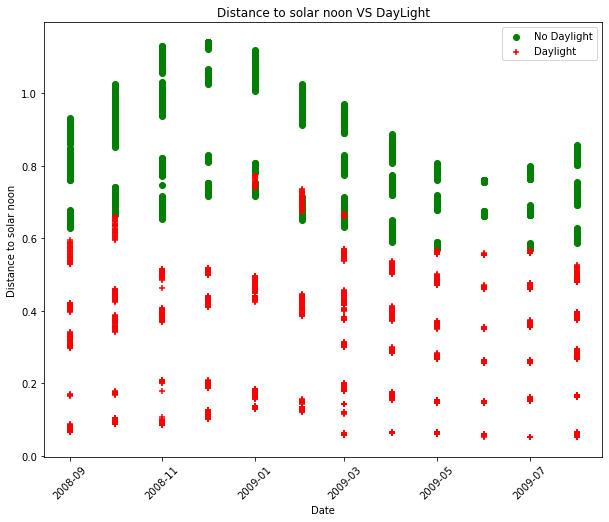

In [20]:
plt.figure(figsize=(10, 8))

plt.scatter(df[df['Is_Daylight']==False]['Year_Month'],df[df['Is_Daylight']==False]['Distance_to_Solar_Noon'],color='green', marker= 'o', label='No Daylight')
plt.scatter(df[df['Is_Daylight']==True]['Year_Month'],df[df['Is_Daylight']==True]['Distance_to_Solar_Noon'],color='red', marker= '+', label='Daylight')
plt.title('Distance to solar noon VS DayLight')
plt.xlabel('Date')
plt.ylabel('Distance to solar noon')

# Rotate the x-axis labels by 45 degrees
plt.xticks(rotation=45)

plt.legend()

plt.show()

**Scatter plot with 'Distance to Solar Noon' vs 'Power Generated'** 

Text(0, 0.5, 'Power Generated')

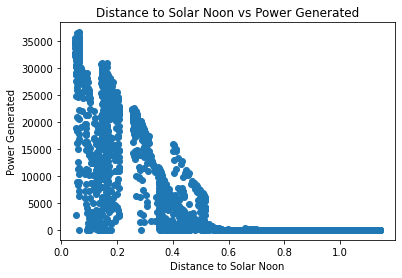

In [21]:
plt.scatter(x=df['Distance_to_Solar_Noon'], y=df['Power_Generated'])

plt.title('Distance to Solar Noon vs Power Generated')

plt.xlabel('Distance to Solar Noon')
plt.ylabel('Power Generated')


We can see that when the distance to solar noon is shorter we get more power generated

Let's see the sum power generated by distance to solar noon per daylight 

Text(0, 0.5, 'Power Generated')

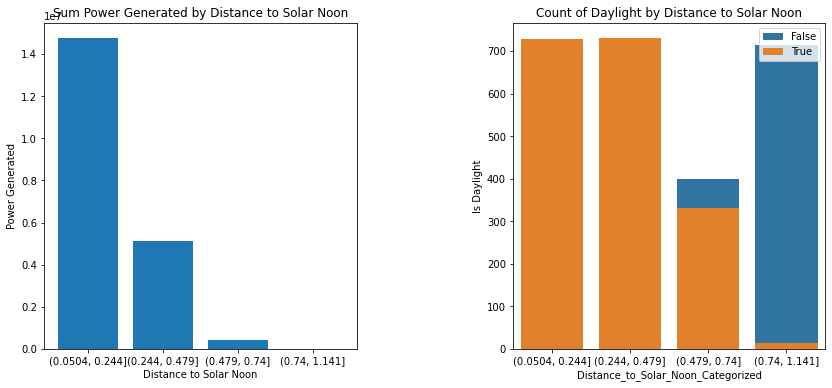

In [26]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14,6))
sns.barplot(x='Distance_to_Solar_Noon_Categorized', y='Power_Generated', data=df, ax=ax1)
ax1.set_title('Power Generated by Distance to Solar Noon')
ax1.set_xlabel('Distance to Solar Noon')
ax1.set_ylabel('Power Generated')

sns.countplot(x='Distance_to_Solar_Noon_Categorized', hue='Is_Daylight', dodge=False, data=df, ax=ax2)
ax2.set_ylabel('Is Daylight')
ax2.set_title("Count of Daylight by Distance to Solar Noon")
plt.legend()
plt.subplots_adjust(wspace=0.5)

agg_func = 'sum'
agg_df = df.groupby('Distance_to_Solar_Noon_Categorized')['Power_Generated'].agg(agg_func).reset_index()
agg_df['Distance_to_Solar_Noon_Categorized'] = agg_df['Distance_to_Solar_Noon_Categorized'].astype(str)
ax1.bar(x=agg_df['Distance_to_Solar_Noon_Categorized'], height=agg_df['Power_Generated'])
ax1.set_title(f'{agg_func.capitalize()} Power Generated by Distance to Solar Noon')
ax1.set_xlabel('Distance to Solar Noon')
ax1.set_ylabel('Power Generated')



In [27]:
sum_power_generated_by_distance = df.groupby(['Distance_to_Solar_Noon_Categorized'])['Power_Generated'].mean()
print(sum_power_generated_by_distance)

Distance_to_Solar_Noon_Categorized
(0.0504, 0.244]    20256.873626
(0.244, 0.479]      7030.689041
(0.479, 0.74]        598.383562
(0.74, 1.141]          0.000000
Name: Power_Generated, dtype: float64


We can see that during the daylight the distance from solar noon is shorter and we get more power generated as opposed to times 
that don't have daylight and the distance to solar noon is longer, so we get less or do not get power generated.

**Relative humidity vs Power generation**

Text(0.5, 1.0, 'Relative Humidity vs Power Generated')

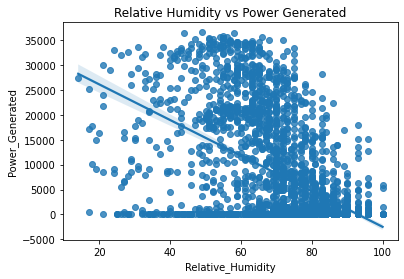

In [59]:
sns.regplot(x=df['Relative_Humidity'], y=df['Power_Generated'])

plt.title('Relative Humidity vs Power Generated')

#plt.xlabel('Relative Humidity')
#plt.ylabel('Power Generated')


We can see that the Relative Humidity increases the Power Generated decreases (-0.52 correlation)

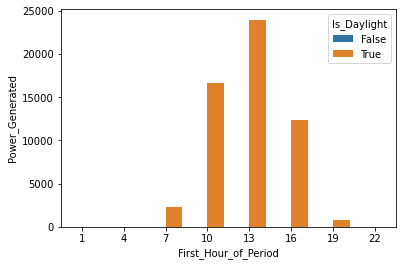

In [29]:
fig =figsize=(12,4)

power_genareted_by_hour = df.groupby(['First_Hour_of_Period', 'Is_Daylight'])['Power_Generated'].mean().reset_index()

sns.barplot(data=power_genareted_by_hour, x='First_Hour_of_Period', y='Power_Generated', hue='Is_Daylight')

plt.show()

In [30]:
type(df['First_Hour_of_Period'])

pandas.core.series.Series

**Sum of 'Power Generated' by 'Sky Cover'** 

In [33]:
Power_genareted_by_sky_cover = df.groupby(['Sky_Cover'])['Power_Generated'].sum()
Power_genareted_by_sky_cover

Sky_Cover
0    3252589
1    8056398
2    3857511
3    4077087
4    1137566
Name: Power_Generated, dtype: int64

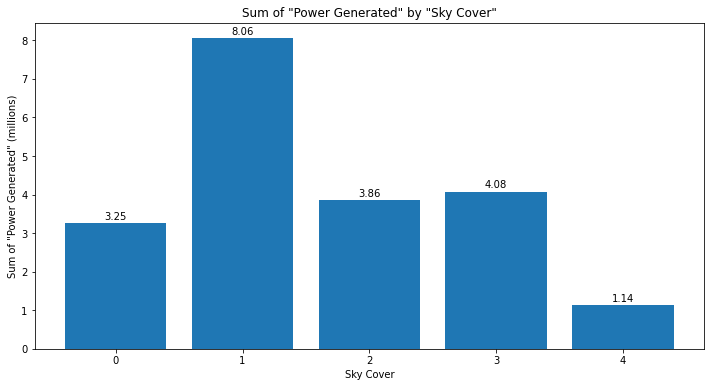

In [31]:
plt.figure(figsize=(12, 6))

Power_genareted_by_sky_cover = df.groupby(['Sky_Cover'])['Power_Generated'].sum()

x = Power_genareted_by_sky_cover.index
y = Power_genareted_by_sky_cover.values/1000000

barplot = plt.bar(x= x, height= y)

for i, v in enumerate(y):
    plt.text(i, v + 0.1, str(round(v, 2)), ha='center', fontweight='normal')

plt.title('Sum of "Power Generated" by "Sky Cover"')

plt.xlabel('Sky Cover')
plt.ylabel('Sum of "Power Generated" (millions)')

plt.xticks(x)

plt.show()

We can see that 
* 'Sky Cover' value of 4 (Partly Cloudy) has the lowest sum of 'Power Generated' at 1.14M
* 'Sky Cover' value of 1 ( Sky covered or less-Fine, but not zero) has the highest sum of 'Power Generated' at 8.06M   

We expect that 'Sky_Cover' with value 1 (Clear sky) has the greater power generated but it's not.
So we will try to explore it

In [15]:
Sky_Cover_0 = df[df['Sky_Cover']==0][['Date', 'Average_Temperature_Day', 'Relative_Humidity']]
Sky_Cover_0

,Date,Average_Temperature_Day,Relative_Humidity
0,2008-09-01,69,75
1,2008-09-01,69,77
2,2008-09-01,69,70
3,2008-09-01,69,33
4,2008-09-01,69,21
...,...,...,...
2787,2009-08-15,67,70
2788,2009-08-15,67,40
2789,2009-08-15,67,53
2839,2009-08-21,68,78


In [16]:
mean_temp = Sky_Cover_0['Average_Temperature_Day'].mean()
mean_rh = Sky_Cover_0['Relative_Humidity'].mean()

print("Mean temperature:", mean_temp)
print("Mean relative humidity:", mean_rh)

Mean temperature: 61.15444015444015
Mean relative humidity: 64.51351351351352


In [17]:
Sky_Cover_1 = df[df['Sky_Cover']==1][['Date', 'Average_Temperature_Day', 'Relative_Humidity']]
Sky_Cover_1

,Date,Average_Temperature_Day,Relative_Humidity
40,2008-09-06,75,57
41,2008-09-06,75,73
42,2008-09-06,75,52
43,2008-09-06,75,66
48,2008-09-07,62,81
...,...,...,...
2903,2009-08-29,74,81
2904,2009-08-30,61,90
2905,2009-08-30,61,90
2916,2009-08-31,63,66


In [18]:
mean_temp = Sky_Cover_1['Average_Temperature_Day'].mean()
mean_rh = Sky_Cover_1['Relative_Humidity'].mean()

print("Mean temperature:", mean_temp)
print("Mean relative humidity:", mean_rh)

Mean temperature: 59.498711340206185
Mean relative humidity: 70.5618556701031


The 'Sky_Cover_o' has a relative humidity lower than 'Sky_Cover_1' and an average temperature that gets more power generated than 'Sky_Cover_1'. This data doesn’t explain why at 'Sky_Cover_1' we get more power generated than 'Sky_Cover_o'.   
We assumed that the unsuitability of data is because we have more measurements at 'Sky_Cover_1' Which you can see in the following calculation.

In [34]:
df['Sky_Cover'].describe(include=[np.number], percentiles=[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]).T

count    2920.000000
mean        1.987671
std         1.411978
min         0.000000
10%         0.000000
20%         1.000000
30%         1.000000
40%         1.000000
50%         2.000000
60%         3.000000
70%         3.000000
80%         4.000000
90%         4.000000
max         4.000000
Name: Sky_Cover, dtype: float64

**Sum of 'Power Generated' by visibility**

In [33]:
Power_genareted_by_visibility = df.groupby(['Visibility'])['Power_Generated'].sum()
Power_genareted_by_visibility

Visibility
0        20224
1        31922
2        50999
3        45807
4       105598
5       176883
6       184863
7       228818
8       354094
9      1001784
10    18180159
Name: Power_Generated, dtype: int64

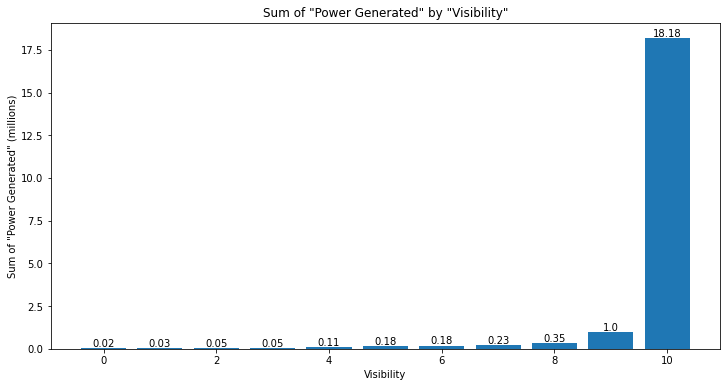

In [34]:
plt.figure(figsize=(12, 6))

x = Power_genareted_by_visibility.index
y = Power_genareted_by_visibility.values/1000000

barplot = plt.bar(x= x, height= y)

for i, v in enumerate(y):
    plt.text(i, v + 0.1, str(round(v, 2)), ha='center', fontweight='normal')

plt.title('Sum of "Power Generated" by "Visibility"')

plt.xlabel('Visibility')
plt.ylabel('Sum of "Power Generated" (millions)')

plt.show()


We can see that **'Visibility' value of 10 has the highest sum of 'Power Generated' at 18.2M**  

**Sum of 'Power Generated' by 'Average Temperature (Day)'**

In [40]:
Power_genareted_by_avg_temp = df.groupby(['Average_Temperature_Day'])['Power_Generated'].sum().sort_values(ascending=False)
Power_genareted_by_avg_temp

Average_Temperature_Day
62    2116208
61    1373017
64    1317759
59    1159801
63    1125515
60    1027864
55     962349
66     950288
57     877567
52     852889
56     799357
54     790143
65     733690
49     676736
58     665566
53     600741
67     448445
50     445067
51     428424
69     378291
71     339544
70     329831
48     288804
47     262895
68     249319
73     243819
74     219232
75     154526
43      95694
46      83876
72      74198
77      71721
76      71392
78      60556
44      39376
42      39309
45      27342
Name: Power_Generated, dtype: int64

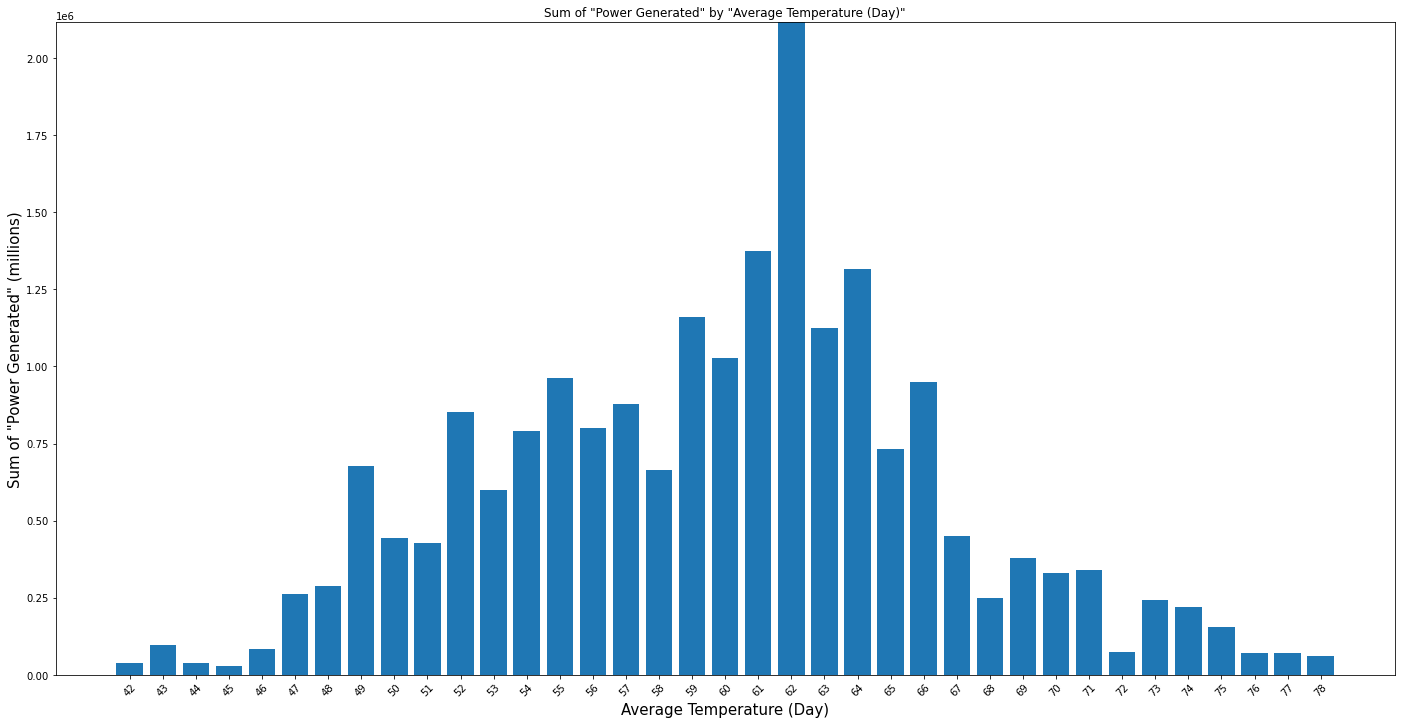

In [54]:
plt.figure(figsize=(24, 12))

x = Power_genareted_by_avg_temp.index
y = Power_genareted_by_avg_temp.values

#fig, ax = plt.subplots()
#ax.bar(x, y)

#plt.show()

barplot = plt.bar(x= x, height= y, width=0.8, align='center')


plt.title('Sum of "Power Generated" by "Average Temperature (Day)"')

plt.xlabel('Average Temperature (Day)', fontsize=15)
plt.ylabel('Sum of "Power Generated" (millions)', fontsize=15)

plt.xticks(x, fontsize=10, rotation=45)
plt.ylim(0, y.max())

plt.show()

In [ ]:
'Average_Temperature (Day)' value of 62 has higest sum of 'Power_Generated' at 2.1M
'Average_Temperature (Day)' value of 45 has lowest sum of 'Power_Generated' at 27K 

# Conclusions

* The features that have the greatest impact on solar power generation are 
Distance to solar noon, Is Daylight and Relative Humidity
- Distance to solar noon and solar power generation have a (-0.75) correlation.
The shorter the distance to solar noon the greater power we get. for instance, if the distance between 0.0504 to 0.244
we get more than 1.4M solar energy and if the distance is between 0.244 to 0.479 we get less than a third of the
energy. about 0.5M 
- Is Daylight and solar Power Generated have a (0.53) correlation.
With more Daylight, we get more power generation
- Relative humidity and power generation have a (-0.52) correlation.
High Relative humidity decreases the solar power generated by half

* When the Cover Sky more clear we get more solar power generation.
* The optimal average temperature (day) is 62F which gets 2.1M solar power generation and when the average temperature (day)
is 45F we get the lowest solar power generation at 27K. 
* In the spring and summer seasons, the mean distance to solar noon gets shorter
